# Ben De Maesschalck / Master Notebook Project2

**In my dataset human stem cell-derived cardiomyocytes were infected with covid-19. According to the paper I should find downregulation of transcriptional pathways related to mitochondrial function, oxidative phosphorylation, and cardiac function and upregulating of the following pathways: responses to organic substance, immune system processes, and apoptosis.<br> The dataset contains 6 runs 3 controls and 3 cases <br>
50% of all reads stem from the coronavirus itself** <br>
Link to data: https://www.ncbi.nlm.nih.gov/geo/query/acc.cgi?acc=GSE150392

# Processing RNAseq data 

In [86]:
mkdir -p /mnt/storage/$USER/jupyternotebooks/Project2
cd /mnt/storage/$USER/jupyternotebooks/Project2

### Downloading .Fastq files to folder Project2

In [87]:
#Cases

#fastq-dump SRR11777734
#fastq-dump SRR11777735
#fastq-dump SRR11777736
#Controls

#fastq-dump SRR11777737
#fastq-dump SRR11777738
#fastq-dump SRR11777739

Read 80924618 spots for SRR11777739
Written 80924618 spots for SRR11777739


In [88]:
#Renaming
mv SRR11777734.fastq case1.fastq
mv SRR11777735.fastq case2.fastq
mv SRR11777736.fastq case3.fastq

mv SRR11777737.fastq control1.fastq
mv SRR11777738.fastq control2.fastq
mv SRR11777739.fastq control3.fastq

mv: cannot stat 'SRR11777734.fastq': No such file or directory
mv: cannot stat 'SRR11777735.fastq': No such file or directory
mv: cannot stat 'SRR11777737.fastq': No such file or directory
mv: cannot stat 'SRR11777738.fastq': No such file or directory


### Quality Control of data

In [89]:
# Generating fastqc reports for the 6 runs
mkdir -p /mnt/storage/$USER/jupyternotebooks/Project2/fastqc
cd /mnt/storage/$USER/jupyternotebooks/Project2/fastqc
fastqc -o . -t 20 ../case1.fastq
fastqc -o . -t 20 ../case2.fastq
fastqc -o . -t 20 ../case3.fastq
fastqc -o . -t 20 ../control1.fastq
fastqc -o . -t 20 ../control2.fastq
fastqc -o . -t 20 ../control3.fastq

Skipping '../case1.fastq' which didn't exist, or couldn't be read
Skipping '../case2.fastq' which didn't exist, or couldn't be read
Started analysis of case3.fastq
Approx 5% complete for case3.fastq
Approx 10% complete for case3.fastq
Approx 15% complete for case3.fastq
Approx 20% complete for case3.fastq
Approx 25% complete for case3.fastq
Approx 30% complete for case3.fastq
Approx 35% complete for case3.fastq
Approx 40% complete for case3.fastq
Approx 45% complete for case3.fastq
Approx 50% complete for case3.fastq
Approx 55% complete for case3.fastq
Approx 60% complete for case3.fastq
Approx 65% complete for case3.fastq
Approx 70% complete for case3.fastq
Approx 75% complete for case3.fastq
Approx 80% complete for case3.fastq
Approx 85% complete for case3.fastq
Approx 90% complete for case3.fastq
Approx 95% complete for case3.fastq
Analysis complete for case3.fastq
Skipping '../control1.fastq' which didn't exist, or couldn't be read
Skipping '../control2.fastq' which didn't exist, o

**For the 6 runs we have high quality reads of length +-75. Adapters do seem to be trimmed beforehand. There do seem to be overrepresented sequences in all cases but in low enough percentages that these won't be a problem (see figure 1 and 2). Controls don't have overrepresented sequences except for control2 which does contain poly-a tails (see figure 3)**

**Figure 1**

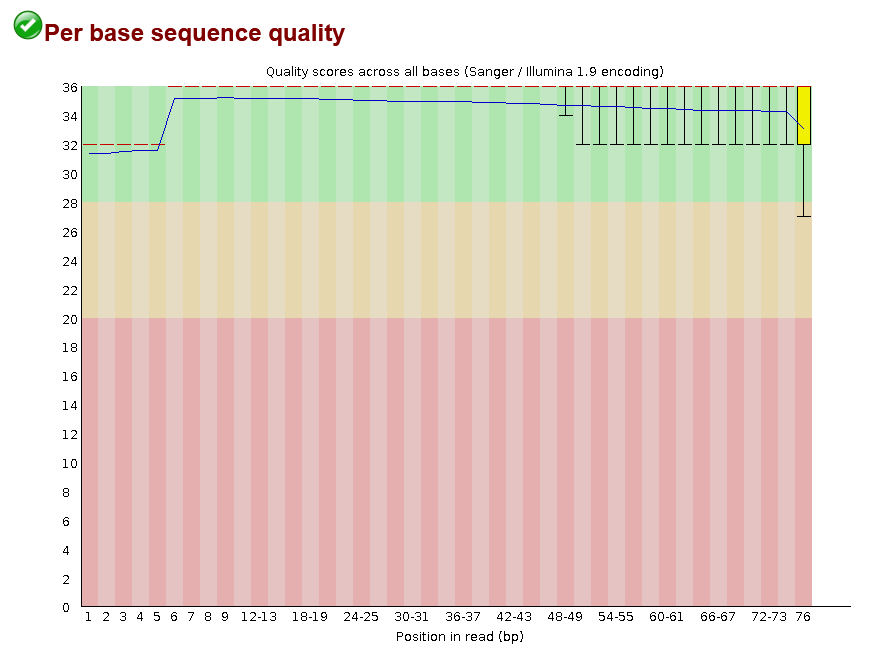

**Figure 2**

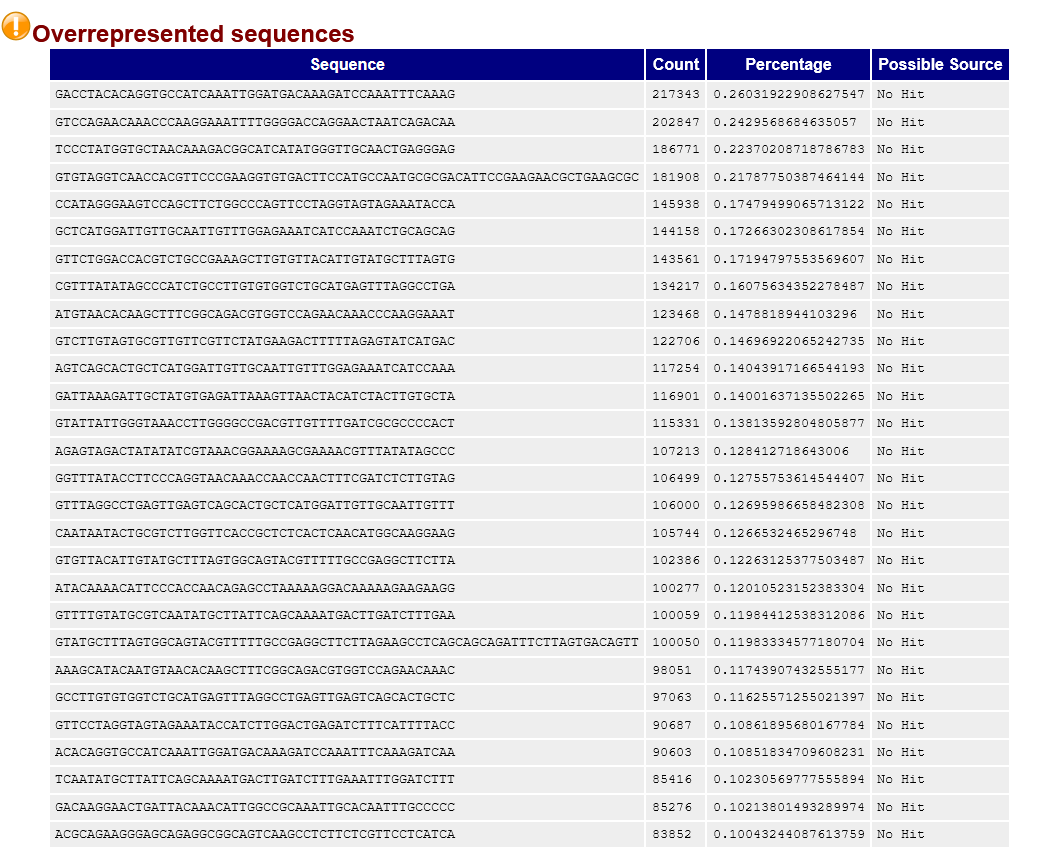

**Figure 3**

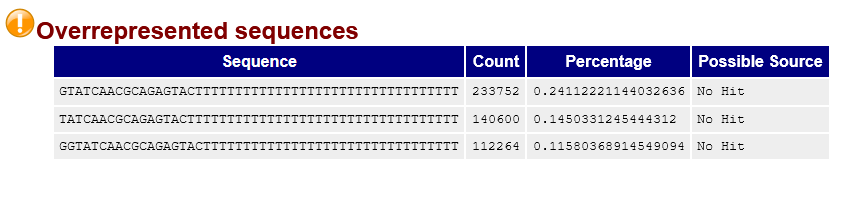

### Mapping the reads to the reference genome using STAR

**In the paper reads were mapped to hg38 but for simplicity I decided to map the reads to hg19 which I have easily available<br/> All mapping will be done in the star folder**

In [90]:
mkdir -p /mnt/storage/$USER/jupyternotebooks/Assignment1/star
cd /mnt/storage/$USER/jupyternotebooks/Assignment1/star

In [38]:
STAR --genomeDir /mnt/nfs/mfiers/STAR/hg19_star_db \
     --genomeLoad LoadAndKeep \
     --runThreadN 20 \
     --readFilesIn ../case1.fastq \
     --outFileNamePrefix Mappedcase1.

Aug 05 11:45:26 ..... started STAR run
Aug 05 11:45:26 ..... loading genome
Aug 05 11:46:29 ..... started mapping
Aug 05 11:51:27 ..... finished successfully


In [39]:
STAR --genomeDir /mnt/nfs/mfiers/STAR/hg19_star_db \
     --genomeLoad LoadAndKeep \
     --runThreadN 20 \
     --readFilesIn ../case2.fastq \
     --outFileNamePrefix Mappedcase2.

Aug 05 11:51:28 ..... started STAR run
Aug 05 11:51:28 ..... loading genome
Aug 05 11:51:28 ..... started mapping
Aug 05 11:55:19 ..... finished successfully


In [91]:
STAR --genomeDir /mnt/nfs/mfiers/STAR/hg19_star_db \
     --genomeLoad LoadAndKeep \
     --runThreadN 20 \
     --readFilesIn ../case3.fastq \
     --outFileNamePrefix Mappedcase3.

Aug 05 18:23:17 ..... started STAR run
Aug 05 18:23:17 ..... loading genome
Aug 05 18:23:17 ..... started mapping
Aug 05 18:27:14 ..... finished successfully


In [ ]:
STAR --genomeDir /mnt/nfs/mfiers/STAR/hg19_star_db \
     --genomeLoad LoadAndKeep \
     --runThreadN 20 \
     --readFilesIn ../control1.fastq \
     --outFileNamePrefix Mappedcontrol1.

In [ ]:
STAR --genomeDir /mnt/nfs/mfiers/STAR/hg19_star_db \
     --genomeLoad LoadAndKeep \
     --runThreadN 20 \
     --readFilesIn ../control2.fastq \
     --outFileNamePrefix Mappedcontrol2.

In [92]:
STAR --genomeDir /mnt/nfs/mfiers/STAR/hg19_star_db \
     --genomeLoad LoadAndKeep \
     --runThreadN 20 \
     --readFilesIn ../control3.fastq \
     --outFileNamePrefix Mappedcontrol3.

Aug 05 18:27:14 ..... started STAR run
Aug 05 18:27:15 ..... loading genome
Aug 05 18:27:15 ..... started mapping
Aug 05 18:29:14 ..... finished successfully


**Moving log files into seperate folder within the star folder**

In [40]:
mkdir -p logfiles

In [93]:
mv *.out  ./logfiles/

**Converting sam to bam and indexing**

In [94]:
samtools sort -o case1.bam Mappedcase1.Aligned.out.sam
samtools sort -o case2.bam Mappedcase2.Aligned.out.sam
samtools sort -o case3.bam Mappedcase3.Aligned.out.sam
samtools sort -o control1.bam Mappedcontrol1.Aligned.out.sam
samtools sort -o control2.bam Mappedcontrol2.Aligned.out.sam
samtools sort -o control3.bam Mappedcontrol3.Aligned.out.sam

[E::hts_open_format] Failed to open file Mappedcase1.Aligned.out.sam
samtools sort: can't open "Mappedcase1.Aligned.out.sam": No such file or directory
[E::hts_open_format] Failed to open file Mappedcase2.Aligned.out.sam
samtools sort: can't open "Mappedcase2.Aligned.out.sam": No such file or directory
[bam_sort_core] merging from 8 files and 1 in-memory blocks...
[E::hts_open_format] Failed to open file Mappedcontrol1.Aligned.out.sam
samtools sort: can't open "Mappedcontrol1.Aligned.out.sam": No such file or directory
[E::hts_open_format] Failed to open file Mappedcontrol2.Aligned.out.sam
samtools sort: can't open "Mappedcontrol2.Aligned.out.sam": No such file or directory
[bam_sort_core] merging from 23 files and 1 in-memory blocks...


In [46]:
samtools index case1.bam
samtools index case2.bam
samtools index case3.bam
samtools index control1.bam
samtools index control2.bam
samtools index control3.bam

**Cleanup: remove .fastq and sam files**

In [96]:
cd /mnt/storage/$USER/jupyternotebooks/Assignment1/star
rm *.sam
rm *.tab
cd /mnt/storage/$USER/jupyternotebooks/Assignment1
rm *.fastq

**Counting data (results in folder featurecount) /// (order = CASE1 CASE2 CASE3 CONTROL1 CONTROL2 CONTROL3)**

In [97]:
mkdir -p ../featurecount
cd /mnt/storage/$USER/jupyternotebooks/Assignment1/star

In [98]:
featureCounts \
    -Q 10 \
    -g gene_name \
    -a /mnt/nfs/data/RNA-seq/gencode.v19.nopseudo.plus.sort.gtf \
    -o ../featurecount/all.counts \
    -T 20 \
    case1.bam case2.bam case3.bam control1.bam control2.bam control3.bam


        ==========     _____ _    _ ____  _____  ______          _____  
        =====         / ____| |  | |  _ \|  __ \|  ____|   /\   |  __ \ 
          =====      | (___ | |  | | |_) | |__) | |__     /  \  | |  | |
            ====      \___ \| |  | |  _ <|  _  /|  __|   / /\ \ | |  | |
              ====    ____) | |__| | |_) | | \ \| |____ / ____ \| |__| |
        ==========   |_____/ \____/|____/|_|  \_\______/_/    \_\_____/
	  v1.6.0

//========================== featureCounts setting ===========================\\
||                                                                            ||
||             Input files : 6 BAM files                                      ||
||                           S case1.bam                                      ||
||                           S case2.bam                                      ||
||                           S case3.bam                                      ||
||                           S control1.bam                      

In [99]:
cd /mnt/storage/$USER/jupyternotebooks/Assignment1/featurecount
cut -f1,7- all.counts | grep -v '^#' > all.gene.counts

In [100]:
head all.gene.counts

Geneid	case1.bam	case2.bam	case3.bam	control1.bam	control2.bam	control3.bam
MIR1302-11	0	0	0	0	0	0
FAM138A	0	0	0	0	0	0
OR4F5	0	0	1	4	0	0
RP11-34P13.7	2	0	0	1	8	1
RP11-34P13.8	0	0	0	0	0	0
AL627309.1	13	12	10	38	50	38
RP11-34P13.14	0	0	0	0	0	0
RP11-34P13.13	4	5	5	18	5	7
RNU6-1100P	0	0	0	0	0	0


### Checking if runs have reads mapped as expected with IGV. TNF and IL12A are expected to have reads in cases

**The 3 first rows are cases in the two figures below**

**TNF does have more reads mapped in cases than in controls. Control1 does have some reads mapped but still less than cases**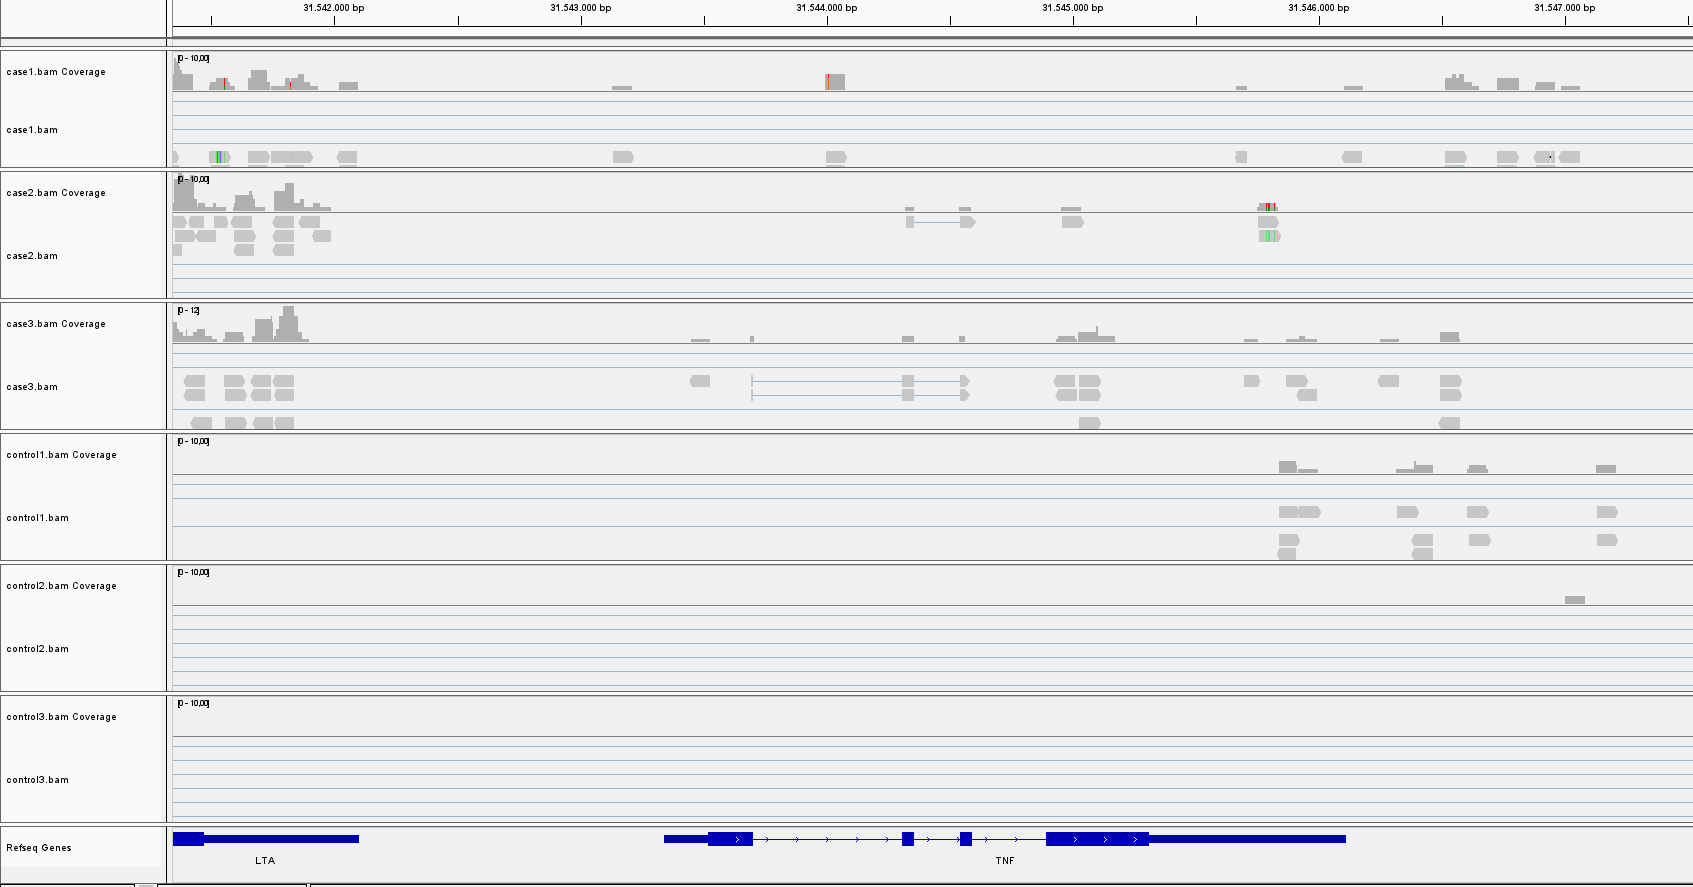

**IL12A does have more reads mapped in cases than in controls. Control1 does have some reads but still less than cases**
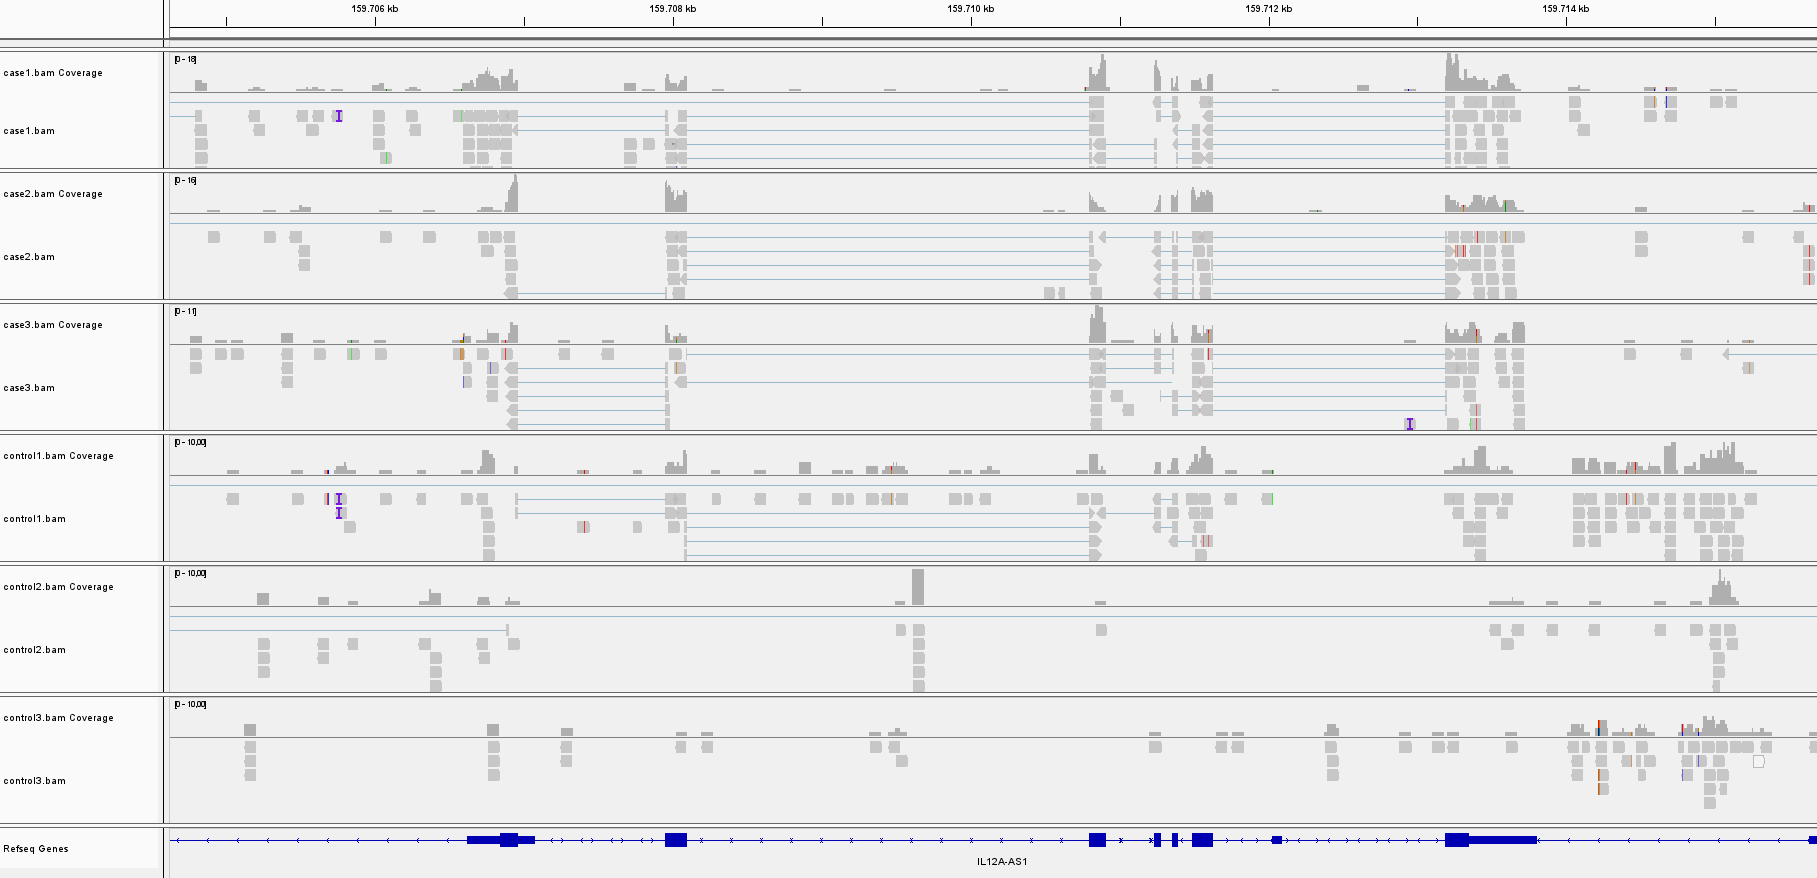

## Swap to R notebook DESEQ (/mnt/storage/r0624449/jupyternotebooks/DESEQ)

## Funtional Analysis

In [102]:
mkdir -p /mnt/storage/$USER/jupyternotebooks/Assignment1/functional_analysis_gene_signatures
cd /mnt/storage/$USER/jupyternotebooks/Assignment1/functional_analysis_gene_signatures

**Manually added gene to the header**

In [113]:
ln -sf /mnt/storage/$USER/jupyternotebooks/Assignment1/DESEQ/deseqresult.txt .

In [114]:
head deseqresult.txt

gene	baseMean	log2FoldChange	lfcSE	stat	pvalue	padj
CXCL2	555.965633773451	5.60643073911983	0.326653433704861	17.1632383457061	5.00437923445862e-66	1.07569131644688e-61
PTGS2	5337.83854138259	7.11307707143512	0.447746823467792	15.8863819878038	7.87431764721388e-57	8.46292289134312e-53
IL11	1283.52884235019	8.44593785557123	0.549874172773849	15.3597646039012	3.04678870366037e-53	2.18302410617266e-49
NUAK2	1642.80680012694	4.71288893453476	0.309378274468511	15.2334191618049	2.12197729885631e-52	1.14029755097291e-48
ANGPTL4	7479.57266756581	6.60243317319434	0.462909530532872	14.2629017933462	3.7263178071207e-46	1.60194402528119e-42
LDB3	9737.80526487847	-3.68162002017875	0.261998718830417	-14.0520535238256	7.4832218710783e-45	2.6808642353138e-41
ALAS2	1460.45761162991	-5.10102938424918	0.370888987836527	-13.7535207340734	4.85101554639458e-43	1.48960827385359e-39
ADPRHL1	1322.50245827518	-4.35510673584984	0.317113291612056	-13.7335988463634	6.38799415523102e-43	1.71637417958363e-39
SPDYA	2

### [g:profiler](https://biit.cs.ut.ee/gprofiler/gost)

### Upregulated

#### From the KEGG pathways we see that pathways related with immune response are upregulated (figure 4). From GO: Biological processes we see that the amount of organic substance (carbon) to the cells increases (figure 5). 

**Figure 4**
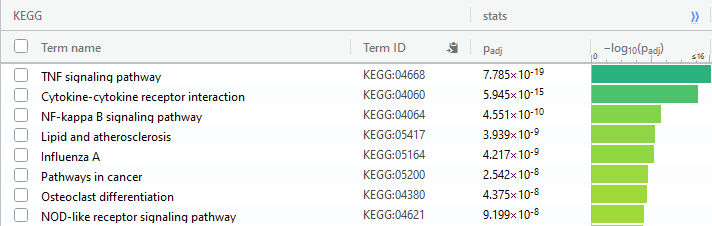

**Figure 5**
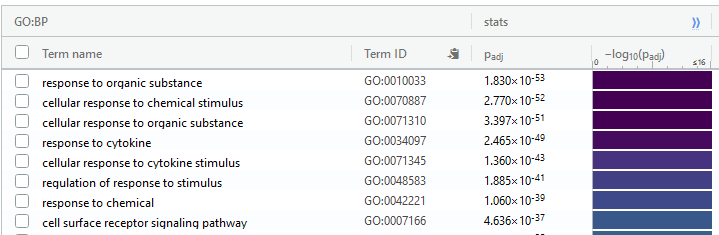

### Downregulated

**Infection with covid seems to negatively affect mitochondria (figure 6). From the kegg pathway we also see that the heart no longer functions normally (Diabetic cardiomyopathy). From the GO: biological proscesses we see that almost all proscesses are related to mitochondria (figure 7). At the bottom we also see that normal heart functioning is affected. This is likely do to the effect that there is not enough energy available since the mitochondria have shut down leading to heart failure.**

**Figure 6**
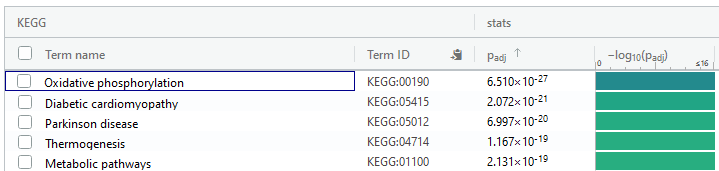

**Figure 7**
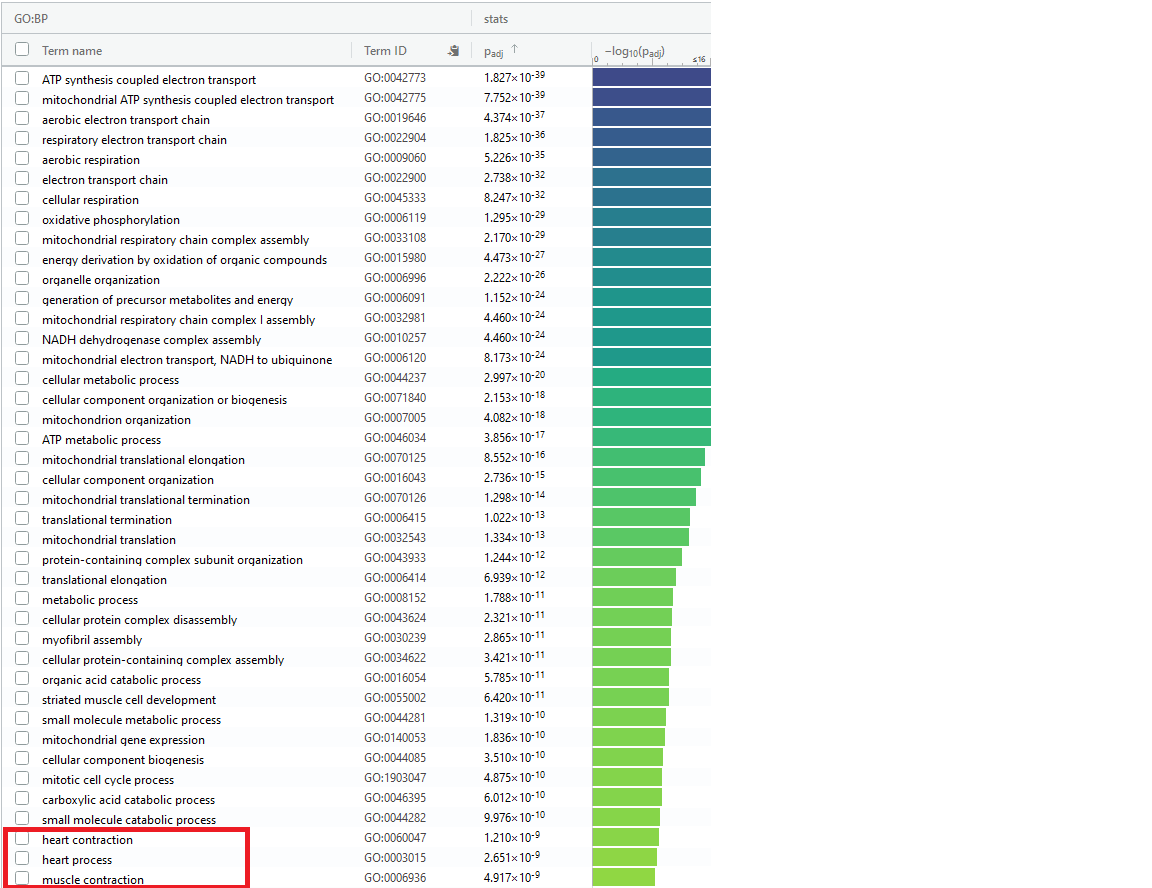

**[GOrilla](http://cbl-gorilla.cs.technion.ac.il/) and [humanmine](https://www.humanmine.org/humanmine) shows similar results. Accoding to the paper apoptosis should be upregulated but this is not something I see clearly in the data**

### [IRegulon](http://iregulon.aertslab.org/)

**I find that downregulated TF belong mostly to the cell cycle (E2F*,FOXM1 and MEF2A which controls cardiomycete proliferation).**

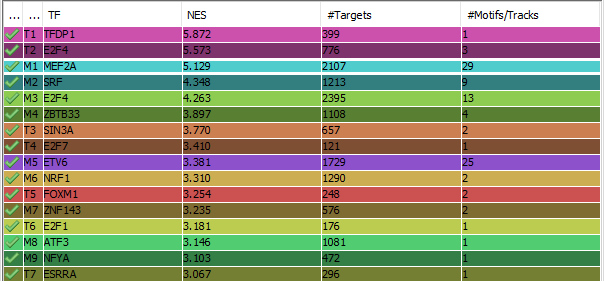

**I find that upregulated TF belong mostly to the anti-viral response pathways with (STAT*).**
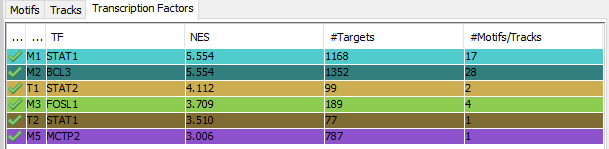